<img src = "https://github.com/user-attachments/assets/52141315-397f-4616-90d1-ae8453c0f964" height="500"/>

## Scatterplots

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

A scatterplot is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other.

<img src = "https://github.com/user-attachments/assets/b0af28a7-f354-4718-9b27-6d4b59d7d313" height="500" />

To quantify how strong the correlation is between the variables, we use a correlation coefficient. Pearson correlation coefficient (r) captures linear relationships. It is a value ranging from -1 to +1. A positive value of r indicates the increase in one variable tends to increase another variable. On the other hand, a negative r means the increase in one variable tends to cause a decrease in another variable. A value close to 0 indicates a weak correlation, and a value close to -1 and +1 indicates a strong correlation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the CSV file
df = pd.read_csv("../Data/fuel-econ.csv")
df.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

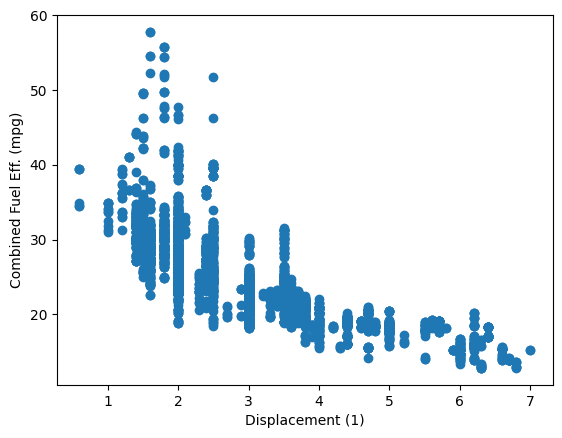

In [3]:
plt.scatter(data=df, x='displ', y='comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

> Matplotlib scatterplot of negative correlation between variables.

> In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

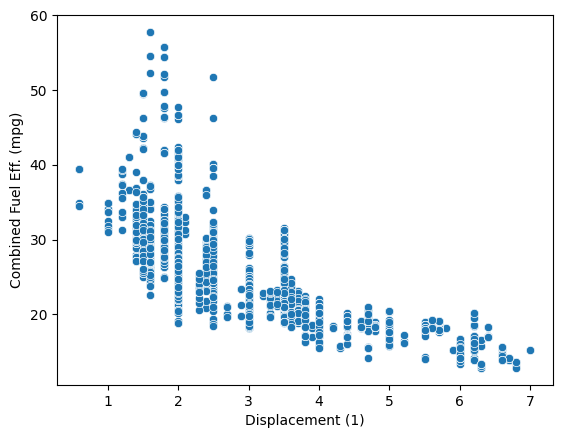

In [4]:
sns.scatterplot(data=df, x='displ', y='comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

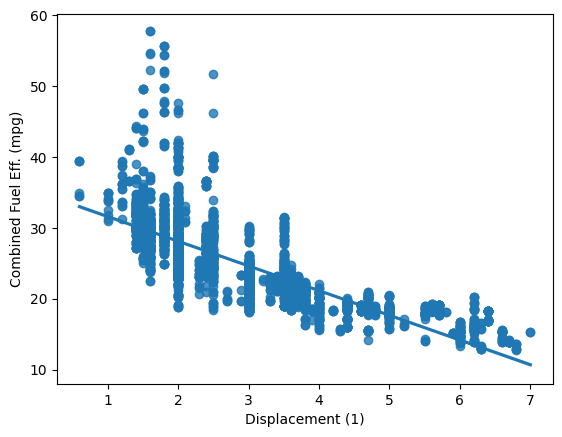

In [5]:
sns.regplot(data=df, x='displ', y='comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

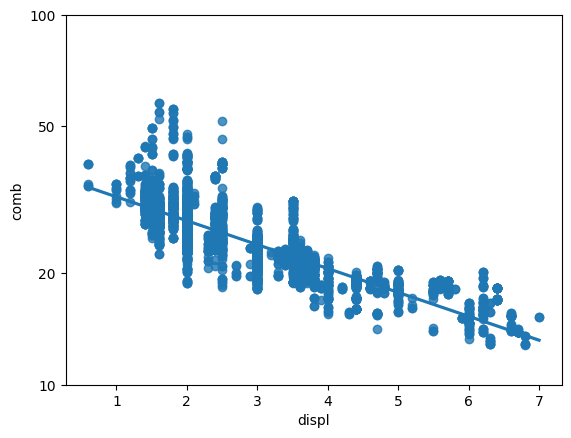

In [6]:
def log_trans(x, inverse=False):
    if inverse:
        return np.power(10, x)
    else:
        return np.log10(x)

sns.regplot(x=df['displ'], y=df['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Overplotting, Transparency, and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

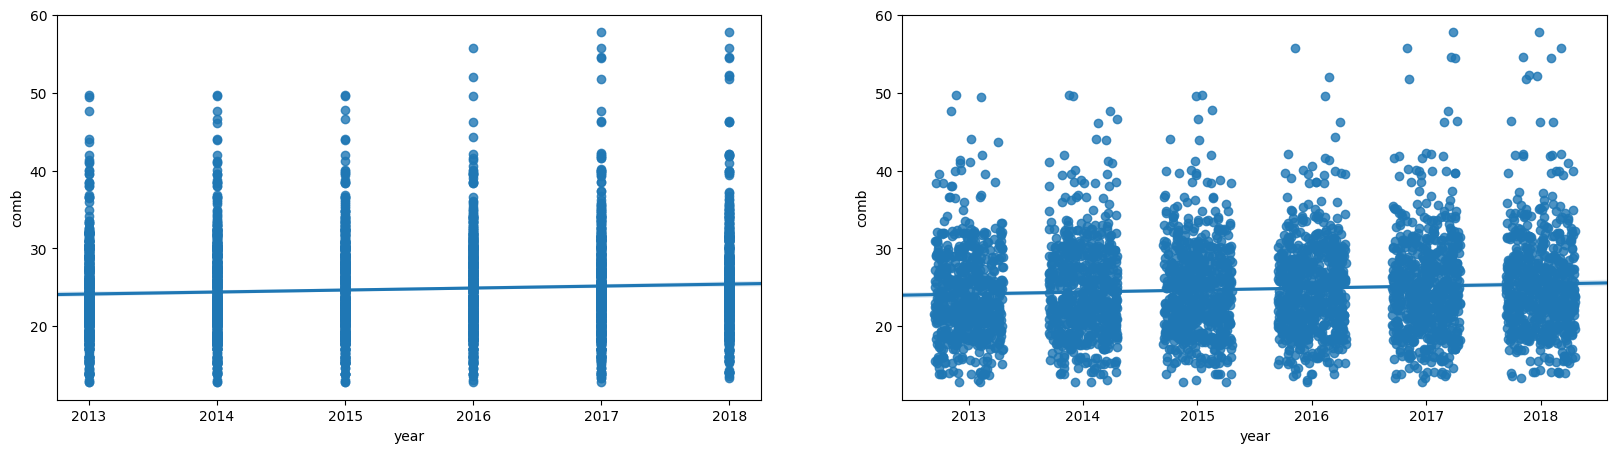

In [7]:
# Resize figure to accommodate two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# PLOT ON LEFT - SIMPLE SCATTER
sns.regplot(data=df, x='year', y='comb', truncate=False, ax=ax1);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
# In the ns.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sns.regplot(data=df, x='year', y='comb', truncate=False, x_jitter=0.3, ax=ax2);

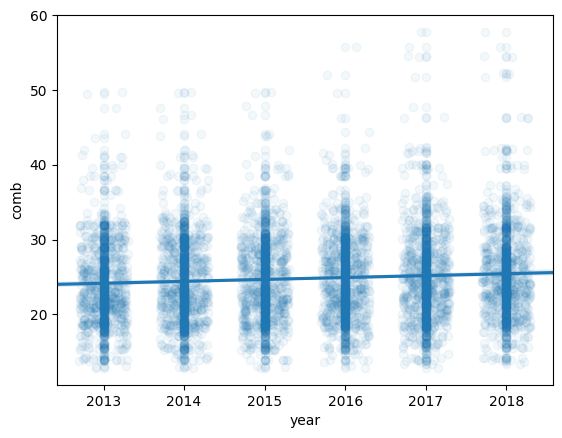

In [8]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sns.regplot(data=df, x='year', y='comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data=df, x='year', y='comb', alpha=1/20);

##  Heat Maps

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d()(opens in a new tab) function.

### Heat maps are useful in the following cases:

- To represent a plot for discrete vs. another discrete variable
- As an alternative to transparency when the data points are enormous

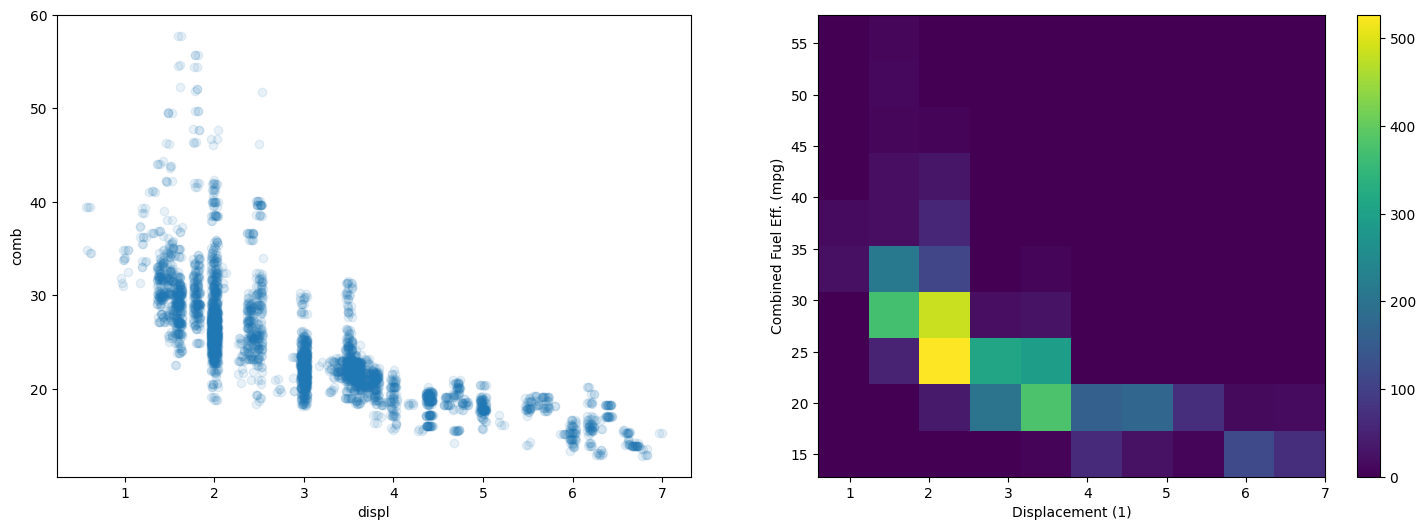

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
# PLOT ON LEFT: SEABORN
sns.regplot(data =df, x='displ', y='comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False, ax=ax1)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT: PYPLOT
plt.subplot(1, 2, 2)
plt.hist2d(data=df, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

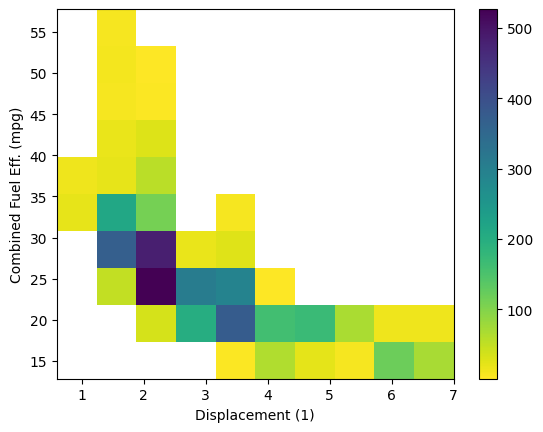

In [10]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data=df, x = 'displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

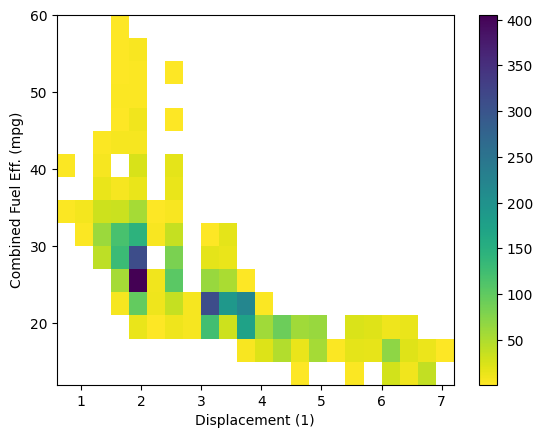

In [12]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data=df, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

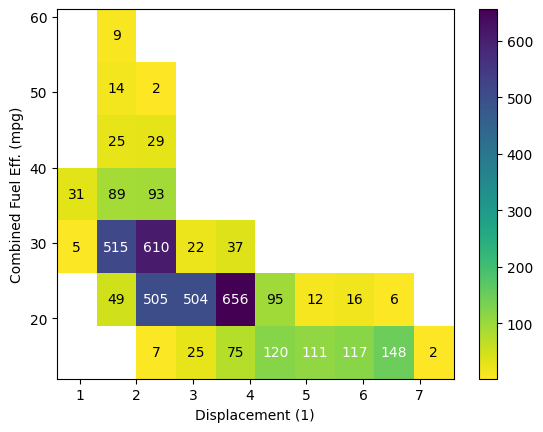

In [14]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data=df, x ='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

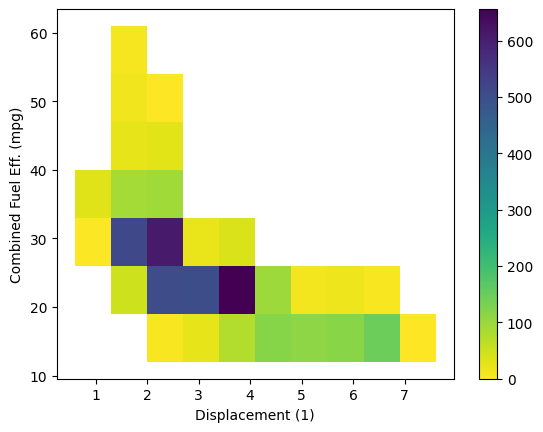

In [15]:
ax = sns.histplot(data=df, x='displ', y='comb', bins=[bins_x, bins_y], cmap='viridis_r', cbar=True)
ax.set_xlabel('Displacement (1)')
ax.set_ylabel('Combined Fuel Eff. (mpg)');

## Violin Plots

Violin plots are a common way of showing the relationship between quantitative and qualitative variables. Instead of simply plotting summary statistics, violin plots use a kernel density estimate (KDE).

A KDE is like a smoothed histogram, an estimate of the data's probability distribution function. For each level of a qualitative variable, a distribution of the values on the quantitative variable is plotted. But beware, since these are estimates of densities, these can sometimes show unreal, particularly at the bounds of the distribution. For instance, given a distribution of cost could produce a violin with parts below zero.

Seaborn's violinplot() function can be used to create violin plots.

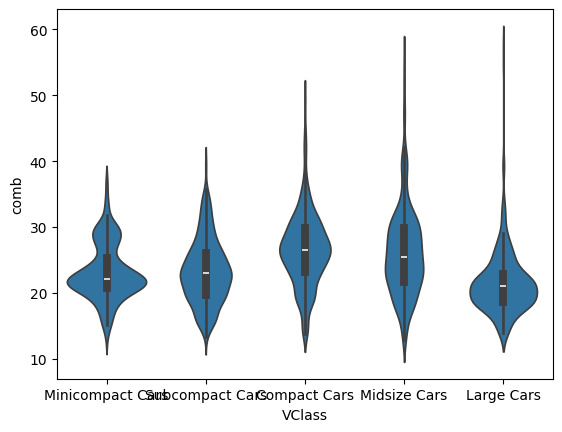

In [16]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df['VClass'] = df['VClass'].astype(vclasses);

sns.violinplot(data=df, x='VClass', y='comb');

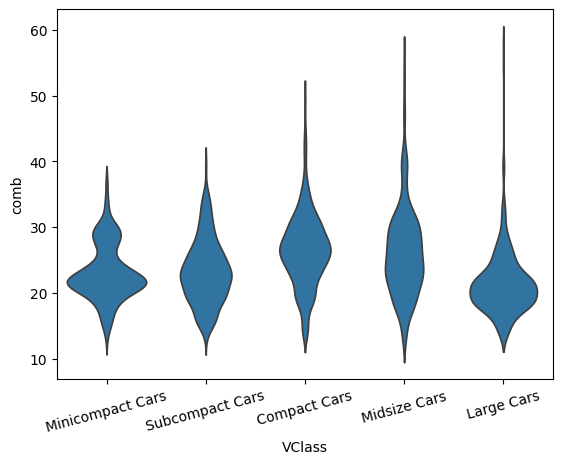

In [17]:
# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=df, x='VClass', y='comb', color='tab:blue', inner=None)
plt.xticks(rotation=15);

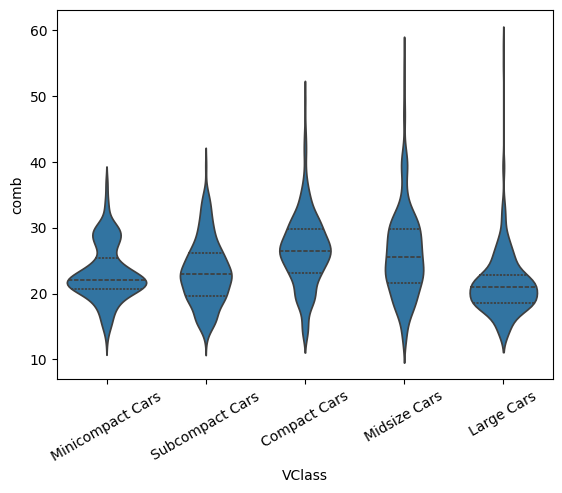

In [18]:
sns.violinplot(data=df, x='VClass', y='comb', color='tab:blue', inner='quartile')
plt.xticks(rotation=30);

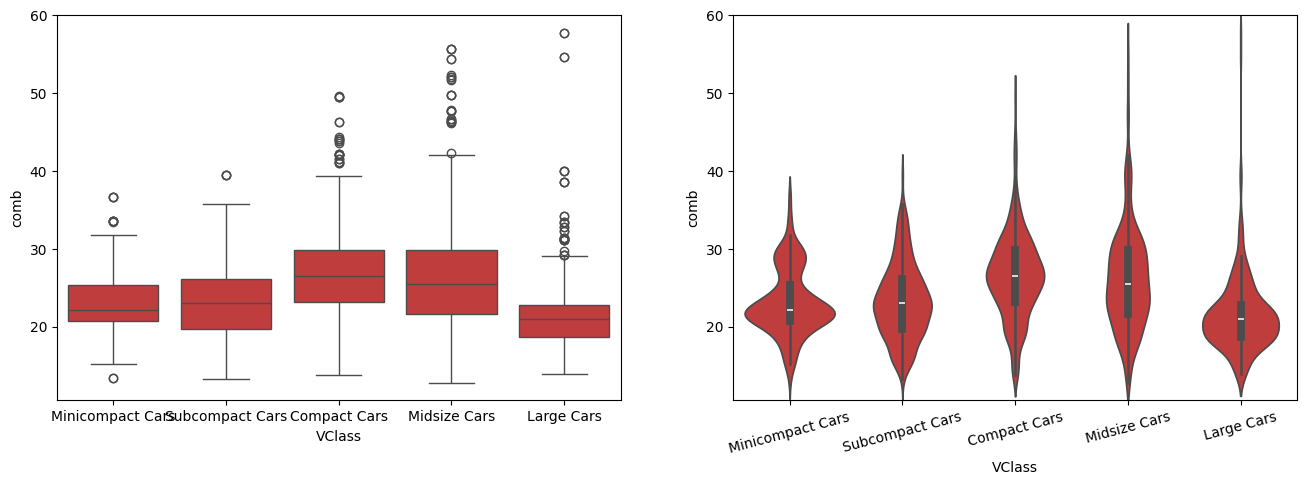

In [20]:
# TWO PLOTS IN ONE FIGURE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

# LEFT plot: box plot
sns.boxplot(data=df, x='VClass', y='comb', color='tab:red', ax=ax1)
plt.xticks(rotation=15);

# RIGHT plot: box plot
sns.violinplot(data=df, x='VClass', y='comb', color='tab:red', ax=ax2)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

> Comparison of box and violin plots

- The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. Recall that in a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR.

- Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the "Large Cars" group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the "Minicompact Cars" values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

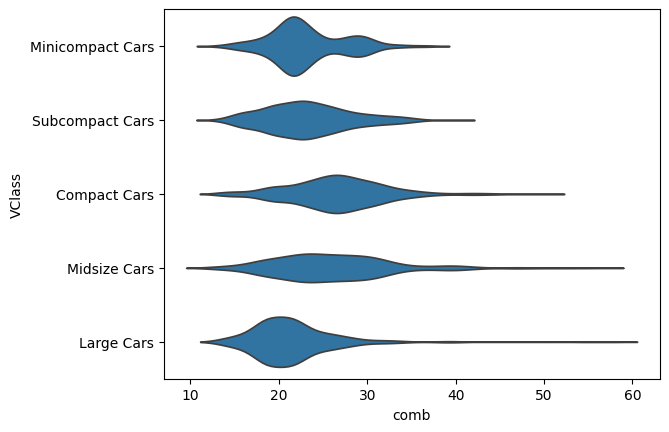

In [21]:
sns.violinplot(data=df, y='VClass', x='comb', color='tab:blue', inner=None);

## Box plot
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Box plots summarize the data's distribution, by reporting a common set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot()(opens in a new tab) function.

Relationships between numerical and categorical data are commonly shown uses box or violin plots.

Box plots simply display salient summary statistics on a plot, such as means, medians, and quartile boundaries.

- Central line indicates the median
- Upper and lower edges show the 1st and 3rd quartiles
- Whiskers outside of the box indicate the largest and smallest values
- Outliers are plotted as points and are often in the 98th or 99th percentile of data

illustration of the anatomy of a box plot:
![image](https://github.com/user-attachments/assets/dff75e75-7a9b-403e-8e4d-13df6ecfc78b)

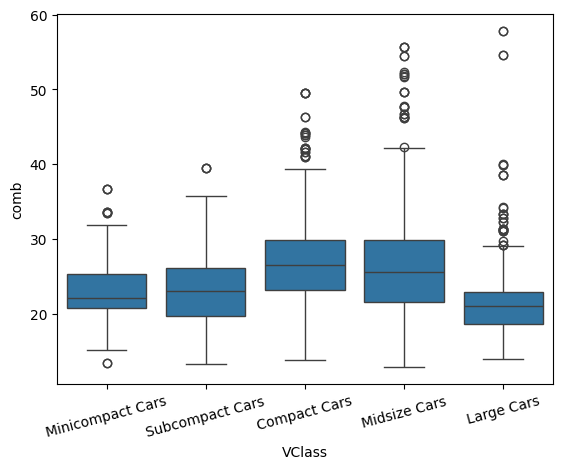

In [23]:
# Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df['VClass'] = df['VClass'].astype(vclasses);

ax1 = sns.boxplot(data=df, x='VClass', y='comb', color='tab:blue')
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim());

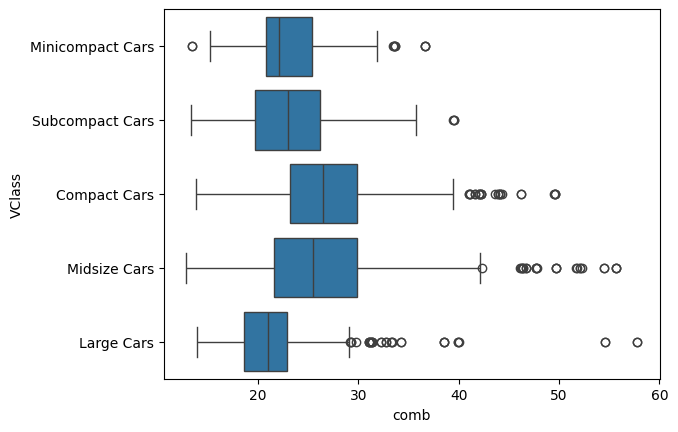

In [26]:
sns.boxplot(data=df, y='VClass', x='comb', color='tab:blue');

## Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot(opens in a new tab) function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument.

We can use clustered bar charts to show the relationship between two qualitative variables. However, to do this, we may need to process the second variable a little so it can be shown as a quantitative value along the y-axis. For example, you can count the frequency of the second variable. Also, you may also apply a color or texture encoding to distinguish the level of the second variable.

In [27]:
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


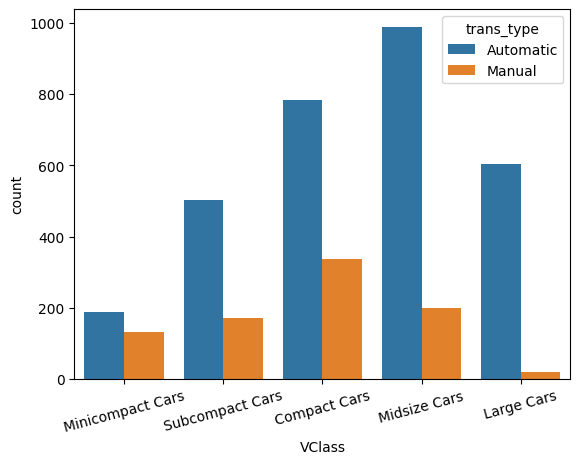

In [29]:
sns.countplot(data=df, x='VClass', hue='trans_type')
plt.xticks(rotation=15);

In [32]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = df.groupby(['VClass', 'trans_type']).size()
ct_counts

C:\Users\SS\AppData\Local\Temp\ipykernel_24104\1504667203.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct_counts = df.groupby(['VClass', 'trans_type']).size()


VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [33]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [34]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


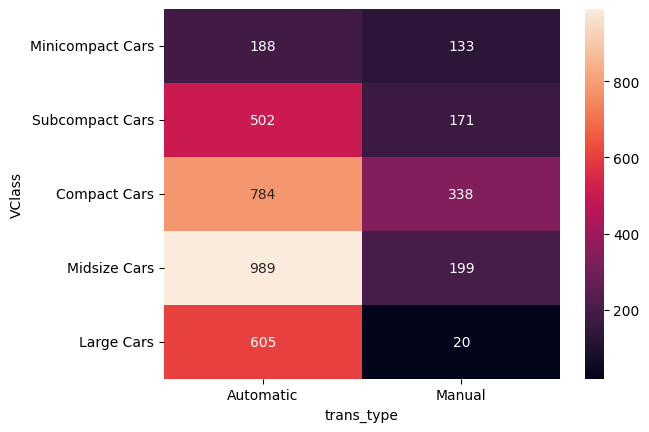

In [36]:
sns.heatmap(ct_counts, annot=True, fmt='d');

## Faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a box plot or violine plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid(opens in a new tab) class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, or "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

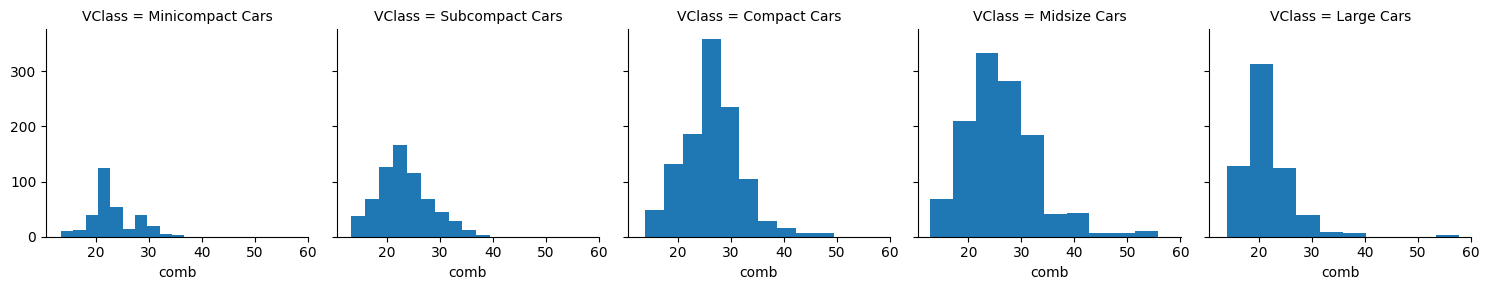

In [38]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data=df, col='VClass')
g.map(plt.hist, 'comb');

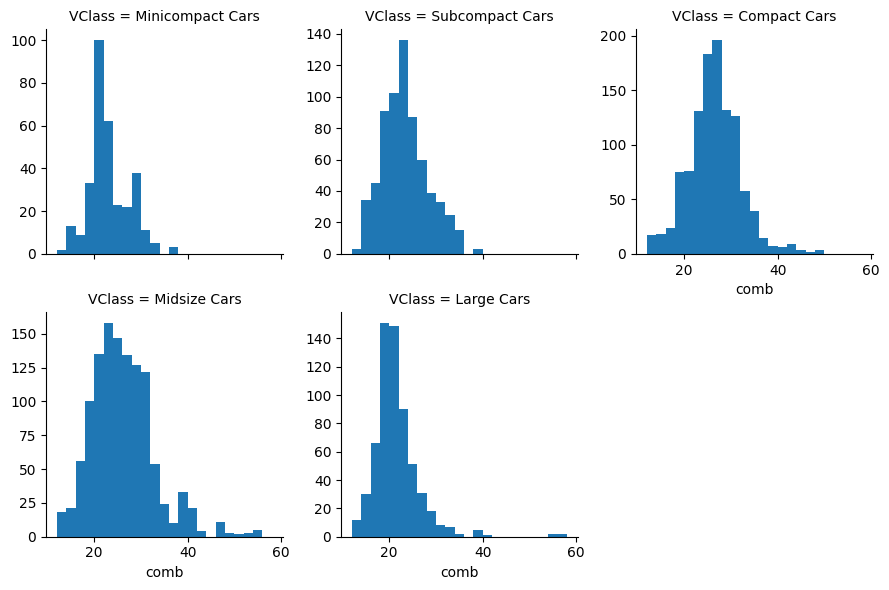

In [39]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, df['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data=df, col='VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins=bin_edges);

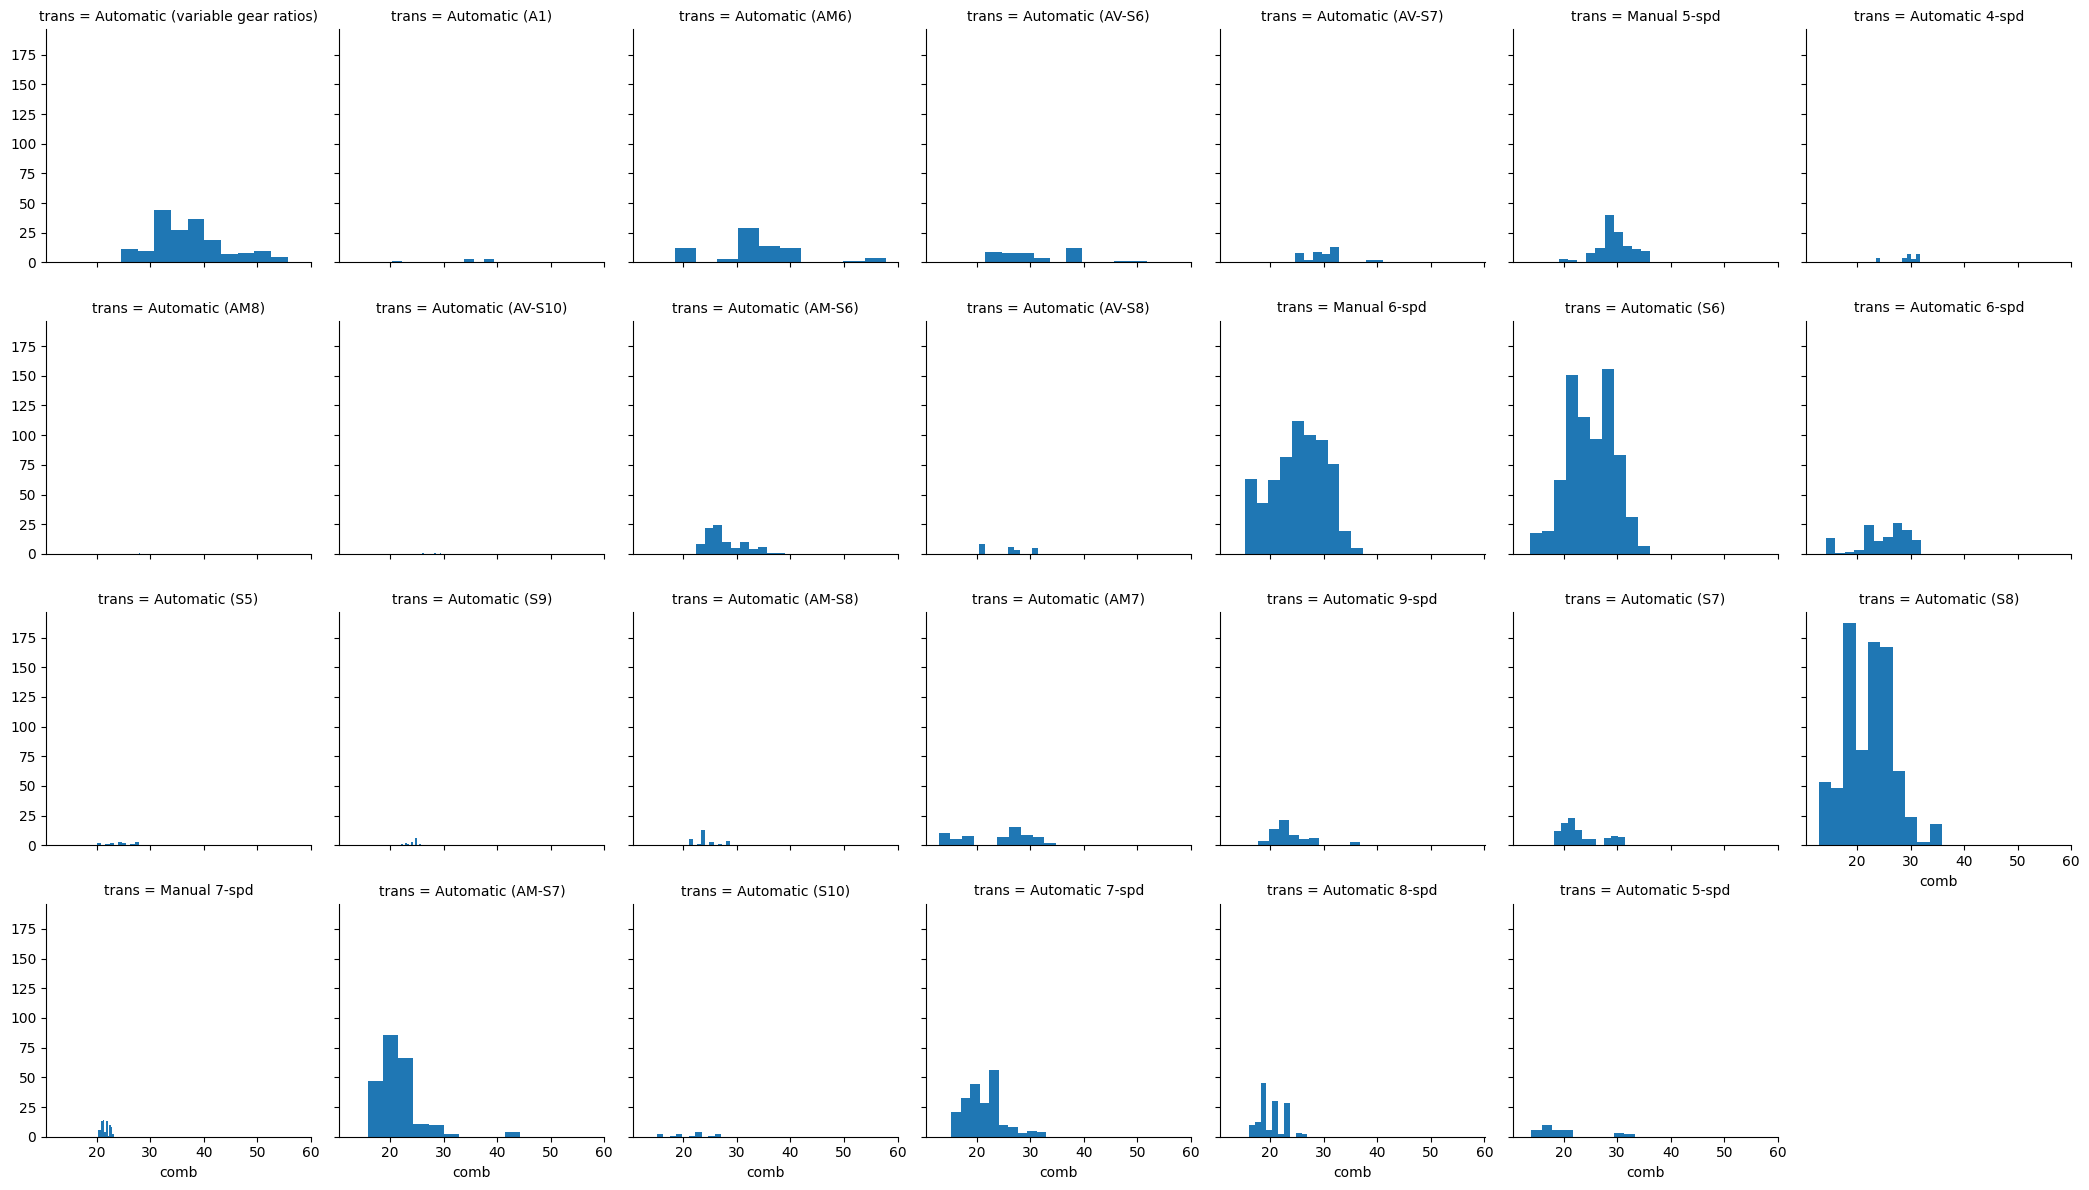

In [41]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = df[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data=df, col='trans', col_wrap=7, col_order=group_order)
g.map(plt.hist, 'comb');

## Adaptation of Univariate Plots

Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot(opens in a new tab) function:

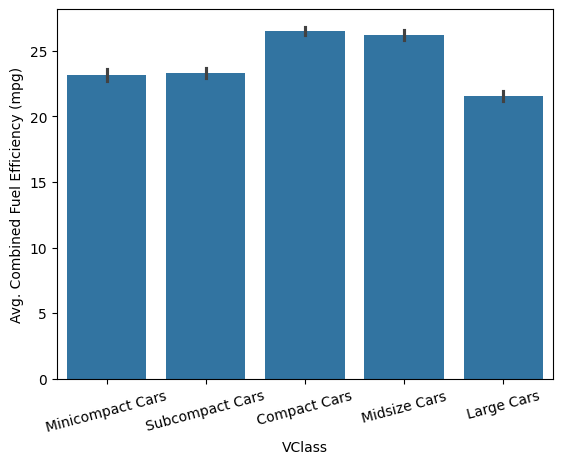

In [43]:
sns.barplot(data=df, x='VClass', y='comb', color='tab:blue')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

C:\Users\SS\AppData\Local\Temp\ipykernel_24104\3762782834.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=df, x='VClass', y='comb', color='tab:orange', errwidth=0)


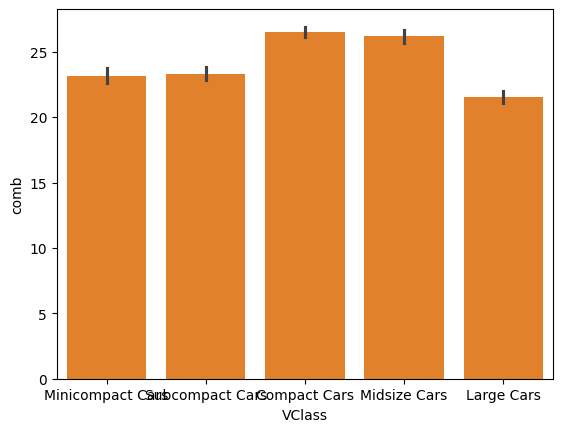

In [45]:
# Try these additional arguments
sns.barplot(data=df, x='VClass', y='comb', color='tab:orange', errwidth=0)
sns.barplot(data=df, x='VClass', y='comb', color='tab:orange', errorbar=('ci', 99));

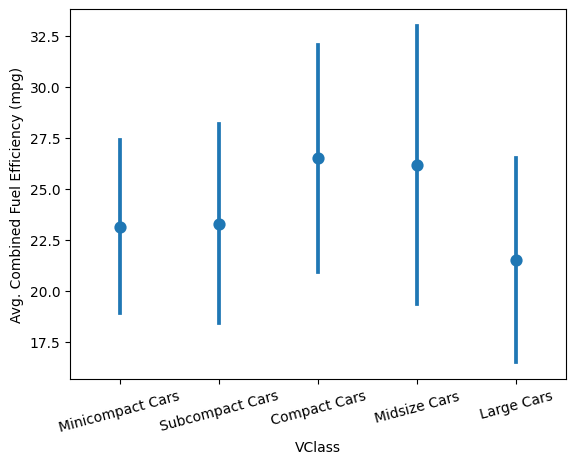

In [47]:
sns.pointplot(data=df, x='VClass', y='comb', color='tab:blue', errorbar='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

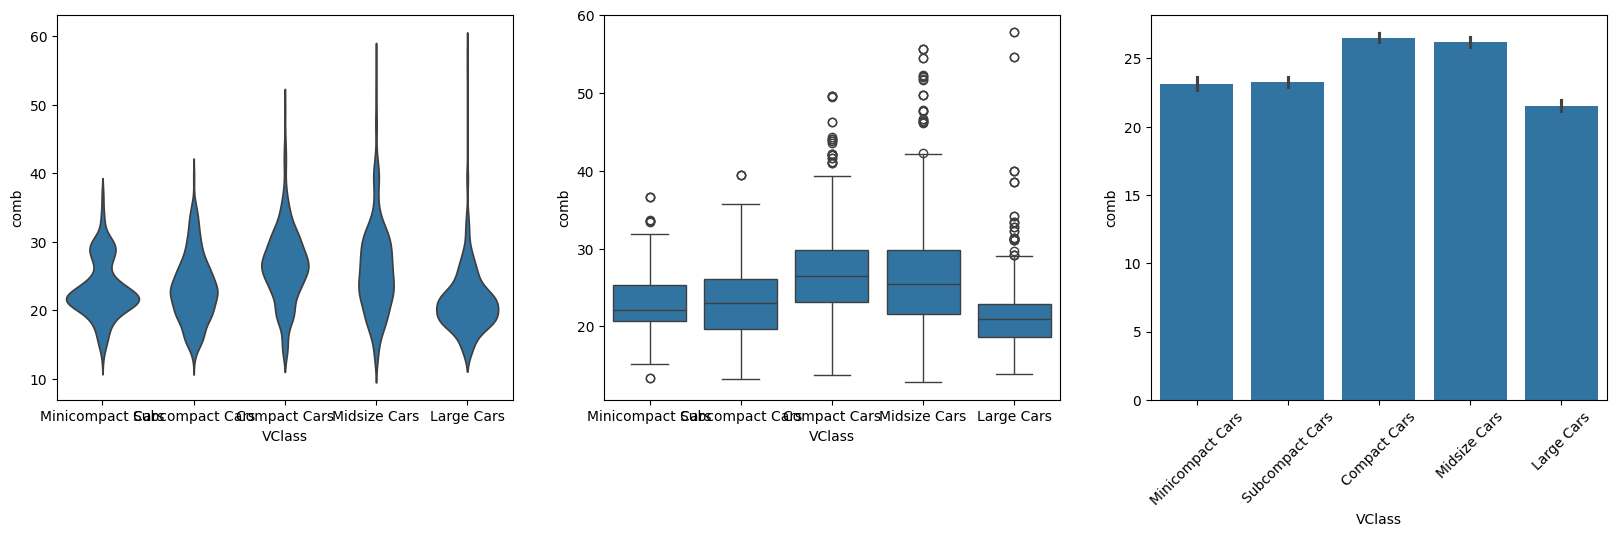

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

# left plot: violin plot
sns.violinplot(data=df, x='VClass', y='comb', inner=None, color='tab:blue', ax=ax[0])
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
sns.boxplot(data=df, x='VClass', y='comb', color='tab:blue', ax=ax[1])
plt.xticks(rotation = 45);

# right plot: adapted bar chart
sns.barplot(data=df, x='VClass', y='comb', color='tab:blue', ax=ax[2])
plt.xticks(rotation = 45);

## Line Plots

The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against the values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's errorbar()(opens in a new tab) function, performing some processing on the data in order to get it into its necessary form.

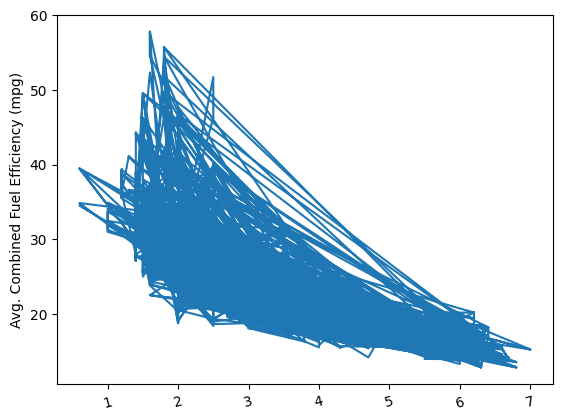

In [49]:
plt.errorbar(data=df, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

> If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [50]:
## Set a number of bins into which the data will be grouped.
## Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

## Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(df['displ'], bin_edges, include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

C:\Users\SS\AppData\Local\Temp\ipykernel_24104\149356072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comb_mean = df['comb'].groupby(displ_binned).mean()
C:\Users\SS\AppData\Local\Temp\ipykernel_24104\149356072.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comb_std = df['comb'].groupby(displ_binned).std()


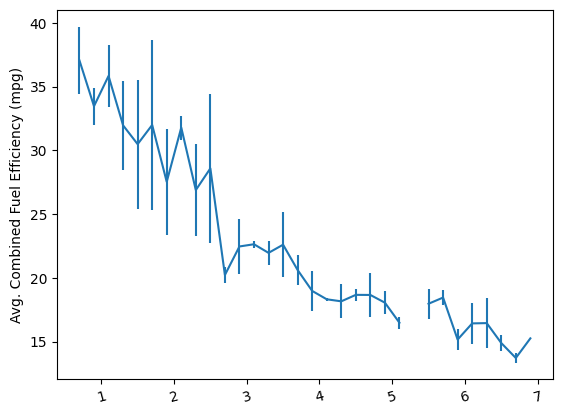

In [51]:
## For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = df['comb'].groupby(displ_binned).mean()
comb_std = df['comb'].groupby(displ_binned).std()

## Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

>  Note about the DataFrame object used in the examples below The visualizations below are based on a synthetic dataframe object df, and show the plots based on its numeric (quantitative) variables, num_var1, num_var2, and a categorical (qualitative) variable, cat_var. The new dataframe has been chosen to reflect the additional relationship between the selected variables.

> Instead of computing summary statistics on fixed bins, you can also make computations on a rolling window through use of pandas' rolling(opens in a new tab) method. Since the rolling window will make computations on sequential rows of the dataframe, we should use sort_values(opens in a new tab) to put the x-values in ascending order first.

In [ ]:
## compute statistics in a rolling window
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

## plot the summarized data
base_color = 'tab:blue'
line_color = 'darkblue'
plt.scatter(data=df, x='num_var1', y='num_var2')
plt.errorbar(x=x_winmean, y=y_median, c=line_color)
plt.errorbar(x=x_winmean, y=y_q1, c=line_color, linestyle='--')
plt.errorbar(x=x_winmean, y=y_q3, c=line_color, linestyle='--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

In [ ]:
bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sns.FacetGrid(data=df, hue='cat_var', size=5)
g.map(plt.hist, "num_var", bins=bin_edges, histtype='step')
g.add_legend()

In [ ]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x=bin_centers, y=counts, **kwargs)

bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sns.FacetGrid(data=df, hue='cat_var', size=5)
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()

![image](https://github.com/user-attachments/assets/0cbf8320-50d4-43bb-8a70-236c9468af34)